# Features Detection and Description in Images

### This is a tutorial about features detection and description in images, you will learn different features and be derived from a image. Our final goal is to use these features to do the traffic sign detection using simple methods.

In this case, we will use some powerful packages for image processing including OpenCV and Scikit-image. 
More details about Opencv and Skimage please visit https://opencv-python-tutroals.readthedocs.io/en/latest/index.html and https://scikit-image.org/

## 1. Feature detection
### 1.1 Point-based
Harris corner

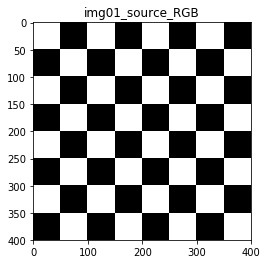

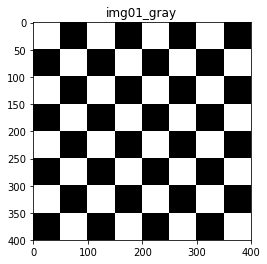

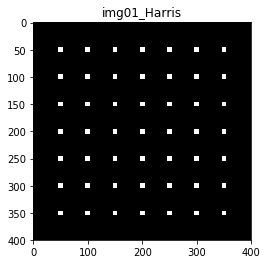

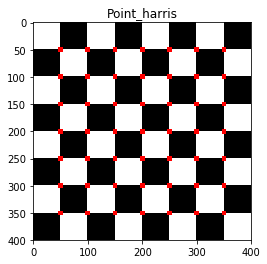

In [77]:
from matplotlib import pyplot as plt
import cv2 
import numpy as np

img01_source = cv2.imread('./chessboard.jpg') # read a image, You can change your picture to demenstrate
#img01_source = cv2.imread('./5.jpg') #5.jpg   4.jpg
img01_source_RGB = cv2.cvtColor(img01_source, cv2.COLOR_BGR2RGB) # Change BGR format to RGB format
#Show
plt.imshow(img01_source_RGB)#plt.imshow(img01_source,cmap=None)
plt.title('img01_source_RGB')
plt.show()

img01_gray = cv2.cvtColor (img01_source_RGB, cv2.COLOR_RGB2GRAY)# Convert RGB color image to gray image
#Show
plt.imshow(img01_gray,cmap=plt.cm.gray)
plt.title('img01_gray')
plt.show()


img01_gray = np.float32(img01_gray)
dst = cv2.cornerHarris(img01_gray,2,3,0.04) #Harris corner
dst = cv2.dilate(dst, (),dst,(-1,-1,),3) #result is dilated for marking the corners, not important
#Show
plt.imshow(dst,cmap=plt.cm.gray)
plt.title('img01_Harris')
plt.show()

#Threshold for an optimal value, it may vary depending on the image
img01_source[dst>0.01*dst.max()]=[255,0,0]# Parameter
plt.show()
plt.imshow(img01_source)
plt.title('Point_harris')
plt.show()



### 1.2 Edge-based:
  1.2.1 Roberts, Prewitt, Sobel, Canny

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.filters import roberts, sobel, prewitt
from skimage import color,io, feature

img = io.imread('./11.jpg') #11.jpg 99.jpg  31.jpg 10.jpg
gray = color.rgb2gray(img)

edge_roberts = roberts(gray)
edge_sobel = sobel(gray)
edge_prewitt = prewitt(gray)
edge_canny=feature.canny(gray) # edge_canny=feature.canny(gray,sigma=3,low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))


ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[0].set_title('Prewitt Edge Detection')

ax[1].imshow(edge_canny, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### 1.2 Edge-based:
  1.2.2 Hough detection:line and circle

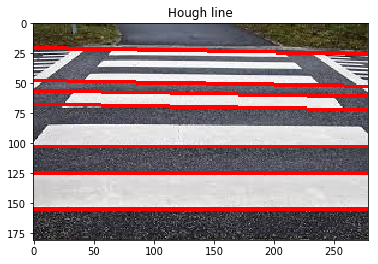

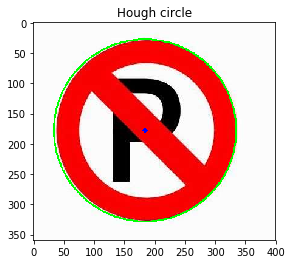

In [76]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Hough line detection
img_line = cv2.imread('./92.jpg') #4.jpg
gray1 = cv2.cvtColor(img_line,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray1,10,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,150)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 3000*(-b))
        y1 = int(y0 + 3000*(a))
        x2 = int(x0 - 3000*(-b))
        y2 = int(y0 - 3000*(a))
        cv2.line(img_line,(x1,y1),(x2,y2),(0,0,255),2)
#Show
img_line = cv2.cvtColor(img_line,cv2.COLOR_BGR2RGB)
plt.imshow(img_line,cmap=None)
plt.title('Hough line')
plt.show()




### Hough circle detection
img_circle = cv2.imread('./1.jpg')
img_circle_gray = cv2.cvtColor(img_circle,cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(img_circle_gray,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=150,maxRadius=500)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_circle,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_circle,(i[0],i[1]),2,(255,0,0),3) 
#Show
cimg = cv2.cvtColor(img_circle,cv2.COLOR_BGR2RGB)
plt.imshow(cimg,cmap=None)
plt.title('Hough circle')
plt.show()

### 1.3 Region-based
1.3.1 Threshold: Otsu's, Niblack

In [ ]:
from skimage import data, io, color
from skimage import filters
from matplotlib import pyplot as plt

img2 = io.imread('./4.jpg')
gray = color.rgb2gray(img2)

thresh_otsu = filters.threshold_otsu(gray)
mask = gray < thresh_otsu

window_size = 5
thresh_niblack = filters.threshold_niblack(gray, window_size = window_size, k =0.5)

# display the images
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(img2)
ax[0].set_title('Original image')

ax[1].imshow(mask, cmap=plt.cm.gray)
ax[1].set_title('Otsu thresholding')

ax[2].imshow(thresh_niblack, cmap=plt.cm.gray)
ax[2].set_title('Niblack thresholding')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


### 1.3 Region-based
1.3.2 Morphology: Erosion, dilation, opening and closing.

In [ ]:
from skimage.morphology import erosion, dilation, opening, closing,disk
from matplotlib import pyplot as plt
from skimage import io,color

img3 = io.imread('./12.png')
gray = color.rgb2gray(img3)

selem = disk(6)
erosion_img = erosion(gray, selem)
dilated_img = dilation(gray, selem)
opened_img = opening(gray, selem)
closed_img = closing(gray, selem)


#-----------------------Display images-----------------------#

plt.imshow(img3)
plt.title('Original image')
plt.show()

fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(erosion_img, cmap=plt.cm.gray)
ax[0].set_title('Erosion operation')

ax[1].imshow(dilated_img, cmap=plt.cm.gray)
ax[1].set_title('Dilation operation')

ax[2].imshow(opened_img, cmap=plt.cm.gray)
ax[2].set_title('Opening operation')

ax[3].imshow(closed_img, cmap=plt.cm.gray)
ax[3].set_title('Closing operation')


for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()



## 2. Color feature
Channel split, Color histogrm

In [ ]:
from matplotlib import pyplot as plt
import cv2

img4 = cv2.imread('./9.jpg') # OpenCV by default reads images in BGR format
plt.imshow(img4)
plt.title('BGR format image')
plt.show()

img5 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB) # This is our original image
plt.imshow(img5)
plt.title('RGB format image')
plt.show()

r,g,b = cv2.split(img5) #Or you can use the following commands
# r = img5[:,:,0]
# g = img5[:,:,1]
# b = img5[:,:,2]

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(r, cmap=plt.cm.gray)
ax[0].set_title('Red Channel')

ax[1].imshow(g, cmap=plt.cm.gray)
ax[1].set_title('Green Channel')

ax[2].imshow(b, cmap=plt.cm.gray)
ax[2].set_title('Blue Channel')


for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


img6 = cv2.imread('./9.jpg',0)
plt.hist(img6.ravel(),256,[0,256])
plt.title('Histogram image')
plt.show()



## 3. Texture feature
GLCM, Gabor and LBP

In [ ]:
from skimage.feature import local_binary_pattern
from matplotlib import pyplot as plt
import cv2

# settings for LBP
radius = 3
n_points = 8 * radius

image7 = cv2.imread('5.jpg',0)
lbp_default = local_binary_pattern(image7, n_points, radius,  method='default')
lbp_ror = local_binary_pattern(image7, n_points, radius,  method='ror')
lbp_uniform = local_binary_pattern(image7, n_points, radius,  method='uniform')
lbp_var = local_binary_pattern(image7, n_points, radius,  method='var')

#-----------------------------Display images----------------------------------#
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(lbp_default, cmap=plt.cm.gray)
ax[0].set_title('LBP-default-method')

ax[1].imshow(lbp_ror, cmap=plt.cm.gray)
ax[1].set_title('LBP-ror-method')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(lbp_uniform, cmap=plt.cm.gray)
ax[0].set_title('LBP-uniform-method')

ax[1].imshow(lbp_var, cmap=plt.cm.gray)
ax[1].set_title('LBP-var-method')


for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()



## 4. Feature description
SIFT and SURF

In [ ]:
import cv2 
from matplotlib import pyplot as plt

img8 = cv2.imread('./3.jpg')
gray = cv2.cvtColor(img8,cv2.COLOR_BGR2GRAY)

# sift = cv2.xfeatures2d.SIFT_create()
# kp = sift.detect(gray,None)
